# Import of the main functions

In [1]:
import numpy as np
import copy
from gmpy2 import mpfr, get_context
get_context().precision=400

from GPPhad import create_from_scratch, retrain, consts
from GPPhad import cov_real, GP_full, print_point, load

In [2]:
# a11 x1 + a12 x2 + a13 x3 = b1
# a21 x1 + a22 x2 + a23 x3 = b2
# a31 x1 + a32 x2 + a33 x3 = b3

# A X = B

# A = [a11 a12 a13
#      a21 a22 a23
#      a31 a32 a33]

# X = [x1 x2 x3]; B = [b1 b2 b3]

# X = B (A)^(-1) 

# A^ A = I

# I X = X

# 8 digit precision: 1.1234567890 = 1.12345678
# 10 digit precision: 1.1234567890 = 1.1234567890
# 400/8 = 50 

# Theta

In [3]:
float(-6.247035679999999757683326606638729572296142578125)
mpfr('-6.247035679999999757683326606638729572296142578125',400)

mpfr('-6.247035679999999757683326606638729572296142578125',400)

In [4]:
th_full = [mpfr('-6.247035679999999757683326606638729572296142578125',400),
 mpfr('0.292807738541853712632700990070588886737823486328125',400),
 mpfr('0.456572889549176519352613468072377145290374755859375',400),
 mpfr('-0.04191095261276779615489118668847368098795413970947265625',400),
 mpfr('0.05475806710280016476044551154700457118451595306396484375',400),
 mpfr('0.10669002480846336011754971195841790176928043365478515625',400),
 mpfr('-5.05760411554052335958431285689584910869598388671875',400),
 mpfr('-0.88172228690680132245915956445969641208648681640625',400),
 mpfr('0.0298605271304240964258536195075066643767058849334716796875',400),
 mpfr('-0.007369150920216244009253170332840454648248851299285888671875',400),
 mpfr('11.3855892321983223069992163800634443759918212890625',400),
 mpfr('-3.817151634735199028369834195473231375217437744140625',400),
 mpfr('0.27150991454327677576685573512804694473743438720703125',400),
 mpfr('0.56436708068229746171340366345248185098171234130859375',400),
 mpfr('-0.06247883283127071696316789939373848028481006622314453125',400),
 mpfr('-0.035707238514284513064556136896499083377420902252197265625',400),
 mpfr('-1.2659861741798399403791108852601610124111175537109375',400)]

# Construction of the GP and marginal likelihood

In [5]:
# y1 is it similar to y2 and how much is it similar to y2
# f(X) = y
# y = (y1 y2 ... yn)
# X = [x11 x12 .. x1m]
#     x11 x12 .. x1m
#     ...
#     xn1 xn2 .. xnm]
# y = (f(x1, x2, ..., xm))

# cov(y1, y2) ~= cov(x1, x2)
# cov = cov_real = exp( -(x1 - x2)**2/2theta_l)




In [6]:
class Book():
    
    def __init__(self, num_pages, rating, new, number_of_words_in_title):
        
        self.num_pages = num_pages
        self.rating = rating
        ...

In [7]:
import numpy as np

N = 100 # Number of samples
M = 10  # Number of features

X = np.random.rand(N, M) # [0, 1]

theta = 0.5

K = np.zeros((N, N))

def cov(x1, x2, theta):
    
    return np.exp( -((x1 - x2)**2).sum()/2/theta**2)


for i in range(N):
    for j in range(i, N):
        if i == j:
            K[i, j] = 1.0
        else:
            K[i, j] = cov(X[i], X[j], 0.5)
            K[j, i] = K[i, j]

print(np.diag(K))
print((K == K.T).sum() == N**2)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
True


In [8]:
x_fixed = [5, 8*10**30]
phases = ['sol_fcc']
GP_NaBr = create_from_scratch(cov_real, th_full, phases, x_fixed = x_fixed)

GP_NaBr.marg_like(th_full, recomp = False)

1987.5736991233351461111343506520466394702160374169905295948978396506108219160717783763260034123461109508868101439290947453


1987.5736991233352455

In [9]:
GP_NaBr.X, GP_NaBr.Y

([['sol_fcc',
   'd_1_0',
   mpfr('0.07841773268420001289139530109562059578820480965077877044677734375',400),
   mpfr('25.625',400),
   mpfr('5.0',400),
   mpfr('1728.0',400)],
  ['sol_fcc',
   'd_0_1',
   mpfr('0.07841773268420001289139530109562059578820480965077877044677734375',400),
   mpfr('25.625',400),
   mpfr('5.0',400),
   mpfr('1728.0',400)],
  ['sol_fcc',
   'd_1_0',
   mpfr('0.04825706626720000793316633913576652048504911363124847412109375',400),
   mpfr('30.625',400),
   mpfr('5.0',400),
   mpfr('1728.0',400)],
  ['sol_fcc',
   'd_0_1',
   mpfr('0.04825706626720000793316633913576652048504911363124847412109375',400),
   mpfr('30.625',400),
   mpfr('5.0',400),
   mpfr('1728.0',400)],
  ['sol_fcc',
   'd_1_0',
   mpfr('0.0741090660532000121830768779584985850306111387908458709716796875',400),
   mpfr('26.875',400),
   mpfr('5.0',400),
   mpfr('1000.0',400)],
  ['sol_fcc',
   'd_0_1',
   mpfr('0.0741090660532000121830768779584985850306111387908458709716796875',400),
   mpfr('26.8

In [10]:
0.07841773268420001289139530109562059578820480965077877044677734375/consts['k']

909.9999999999999

In [11]:
consts['k']

8.617333262000001e-05

In [12]:
with open('dataset_NaBr.txt', 'w') as f:
    f.write('phase, derivative, T, V, cut, N, mean, variance\n')
    for i, el in enumerate(GP_NaBr.X):
        f.write(f"{el[0]} {el[1]} {el[2]/consts['k']} {el[3]}, {el[4]} {el[5]} {GP_NaBr.Y[i][0]} {GP_NaBr.err[i][2]}\n")

In [13]:
GP_NaBr.err[0][2]

mpfr('2.0240928852801919762423158949850477613718641806197993547530297825273950698604819096844221642356813956416159201005453537689e-05',400)

In [14]:
GP_NaBr.add_H(V=30, phase = 'sol_fcc')

# Training per phase and addition of melt points

In [15]:
GP_NaBr.bounds = {"sol_fcc": [25, 34]}
ind_bounds = {'sol_fcc': range(6, 11)}
#GP_Li, th_temp = retrain(GP_Li, melt_points, ind_bounds)

#GP_Li.marg_like(GP_Li.th, recomp = False)
GP_NaBr.optimize(GP_NaBr.th, ind= ind_bounds['sol_fcc'])

2071.7599930295178886211499569214441476419073787593930076832769781801656635990657752665633259537280431304793883491014622524
2071.7599930295178189555885662121769576567091271537182907475802171328079771929024258843605444960032002523750797181627330171
2071.7599540452521138417817365664335291583584576059958324648867215005473713620967718674892145647559631546530814825805171287
2071.7607384865909335924109016360100219817305515207459069784170042683345633020758358594936989388603421350180722414302917647
2071.7556444867090052112494673664164279741957511747371881858543884841980822437399921249899371401077667062644800965117329297
2071.7599930082026018585979477514160035217889174630724713489406486188765481332935075124090760478360011379593887358760875679
732216.8344015307804984485077453410125504598960350352877869015418031438838117873767352562554072515276053607278452477959824
732216.83440153077948593273150262019262726991071051904043951725637473013970669217286971563831436920806124142365657026747725
732216.80

85.901344934688246004648312124418657245092329246937784621216604715673361022420938873586541581143610854760948543752612724737
85.901341596484836015796400433199496034284094609209239337628326514811751193039211880385627216912174516756357364229867997362
85.895569932726903088155943508308430087394919483952135486748369703355464539354788934954194783294271882019801428377437105316
85.895569932726886914124844691969382955687084980191479042653490524157981634142132875893532663743076490011459887403277153233
85.895568129137738683932498266527775506789221681353686962940938459033435442934974269929377132189219313732070453959452443362
85.895577297251239131866302866875429696771283896388885199161033399432164958534999344728129778989636512182985591203784430253
85.895562853508443764199861315712724450505920899484437979335086581597317031411975325651411150195950176961575796402736194702
85.895569932726416839316781292172565465297388579248128888487259811762667286317826913553648016132641653200820994997071924111
85.85364

72.717424497830002300234277143675906627346273900474280605423515541247452727951922145622438653930382037238111125175291601003
72.717390081157907763003174404417613099905057675043239570529237227565296533829340046843343104997491198906219503292217524164
72.717424582629161573082641411707857455882608998640927389490939270297230546690420211895067984207028934759260440047513196325
72.683024202636069156684960873785221662526128980754827624890291768579404763017327292224126663112790954165606246752870283278
72.683024202636062485703211557037448802109937248410096787067262863111355575510596103327939162808647595064585483584723810132
72.683023045900372364151598627504808341184436024647776917083691916996619643179894583533544622439962941358907225815662713203
72.683023936500210304522863222854897838030378534444411386632698253420867696213184624944145274534260824293107838441388839162
72.683016502745705917511312573417984270587751337099510804275744897067442847339160484180599724612520622571630946903826321773
72.68302

71.135782994972539995607848250581488361037127551318767389906598510123864437597743622855835071594104519093285403068995361637
71.135613825497731527198070879204176767594325487303895325988804705631928814431569983530896842292969718842938920222507562407
69.350790311420927264149249585697370492207067605585054213826426042919345504909060714734730880786314112378385592944784429403
69.350790311420922903065750751209990939564394549592856890400514125002677161508486909051939788861716771734035757512873270724
69.350789644749493006086622084110739254398514200618080743687849622756176208540034698534634669917763392465104120904643973293
69.350791645724572855602846623052989593182145460494970999961663511573839603215124119255765797420835885789589588926794593071
69.351017530024920088904551857034252661594159916024346982798469507747290463522773933915804989713117520528448176743084513537
69.350790311420336007906763023702422583778190762164465942881980502649871904183458730939458248168949868861350895333179677039
66.05564

30.919492233982984054476226583378020572531834966011060888328977251767765765416716657922294413014739380459755885092805234398
30.919490884697416331461632711136941846088818982921858056217760909316713136345618326656892116413572078879024813933600140939
30.919373854732618524099073017155375960237270328171751603160572048204593298239009555100493451388113386099558733030245763595
30.919492182650362119335532817121935939881574047438839074211965715326286836991158075407975739796779336832754834509167930737
24.126389795370174959952644708078330662526671431593142744665061961670015183146474443053656115885943567772223013510886925882
24.126389795370174959897591326445783831296663181631791236294442679175928849223432193984491711457145534156745856105783619279
24.126390304073407093810298693962505658186239509710732856957170240819793529618009688035963480919455413691485786628969453623
24.126385381858326324950667103588739060620334838892690367919408147923359538418462972027146714228814816154132662988719002236
24.12645

-22.837434652005473398353419212814190816217166533420899476221760771539863885035938192721507381990993063102790184666109638212
-22.837434659376953639603237393450188763383465058698789477068475308899492115178611167553001374983789002649647989162512046054
-22.837434683255815871868957416184937002115790958582326543315635490007258228271860951527203615376252432330670979126432889619
-22.837436872527269582866950170350693550785193734124422672260122421753892713813114677046203498309192026529492546861872998939
-22.837434654264268584024296005078583757499901788329454092645393927775161803839174827626482481172774147132297234213205459992
-22.852601144617134017745010087936973633168260575372550569657460827165637655123334944609558338349710315951348542449582917955
-22.852601144617134069584310531519977007999077369487316927176424558709779842845366635160810796056431541642215647271366506641
-22.852601138533212969315885958311326081886916747754839299129794592425837022713594992886416077760680672437122984524239345409


-22.867822902849438540895179191275553656262692030615792918310621363863458349579623814268288030617283228032721159436243942169
-22.867822905764687120232970230908917484219899407340392574453869667132456527755495473273658770722973306638268315039576382551
-22.867820805276651897114070452275080772692049021389351669107398171522675365109562191348653880411961414663861988336291855983
-22.867822905105762250329085498750633519704042730549899007371919108638430892427673897903604688846714783905497111014119944318
-22.869292284176004594657325519824329656567374436232677514212009544830700595404192711406106155115615587337779603188343354278
-22.869292284176004644292007697503017095340432474776286170829045167222306397768797082845887274787561296120917575229084041982
-22.869292284821232248805103174801824709177305138044068147984889940322331640335010801230494796111196657477683165673865795536
-22.869292289970402045550803465491625842360315755587198254171617143264617785186005466723999803304815685859538155672754184099


-23.969406431331329430900173391610556329300595640953061398127762077535841724736550052070499389086653105106463541090063197712
-23.993328776828155896707860345619757321233150828680915216165970536003134639633303621403452804025327493439707539395723274308
-23.993328776828155943335208233649407852557317462341548734612035254821741821481743629835467597407059370655271086206177220308
-23.993328786519415555450889719101935007983349312675304930996458225484803367716113680337517806209570342044808075854763917721
-23.993328689153007985286074781210124143628127284217444857047697135500315015861012304506715560090564113921327171564471106759
-23.993331942374199347016675822851226576574214670758513050493459568979826294339648630732646342931423883208632541574373689891
-23.993328777153923490518843145017586312694666601887758938246074191946066233503588945457011277977887595405672279326032808552
-23.995102080143520503543764670972575797021930435811612966635199304161339350156405805112182361269401675115391502511079460428


-24.114836929182502195303581007788217386327068185160386806284298428897620096713949568971975083387928209822388889005170302637
-24.114836929205874650232022945089006831744741839499850691413555819047227994780507945453792631975888412548735868800516662636
-24.114836929145460130061441731074172148934206362103555531550880936161793932250594643412220577555105334840710999349115772039
-24.114836943738773383233629882567852200405746866098235269628450372681367854525677729896808708953724352304228868804339915208
-24.114836929182889491534027214667441036542837954103848005721314175977950415270792837453940436482788478469548432477373720377
-24.114837004756582176580056950249195993225752825515915004423007278856155554439773079711044978552565494004327693687325246917
-24.114837004756582236181916390671853466334427527554396868403806001839298352989877763666025126694573309175141351388810080223
-24.114837004758588716008801144138390255408481064924123741637482016612025249680779712390849901844576315317600633049798362559


(-24.114837005034111428,
 [mpfr('-6.247035679999999757683326606638729572296142578125',400),
  mpfr('0.292807738541853712632700990070588886737823486328125',400),
  mpfr('0.456572889549176519352613468072377145290374755859375',400),
  mpfr('-0.04191095261276779615489118668847368098795413970947265625',400),
  mpfr('0.05475806710280016476044551154700457118451595306396484375',400),
  mpfr('0.10669002480846336011754971195841790176928043365478515625',400),
  mpfr('-5.05760410116916592215829950873740017414093017578125',400),
  mpfr('-0.11049108486623694658224081877051503397524356842041015625',400),
  mpfr('0.24184307818262962275213112661731429398059844970703125',400),
  mpfr('-0.0026546468918350013370399675949329321156255900859832763671875',400),
  mpfr('24.8613511700543341476077330298721790313720703125',400),
  mpfr('-3.817151634735199028369834195473231375217437744140625',400),
  mpfr('0.27150991454327677576685573512804694473743438720703125',400),
  mpfr('0.564367080682297461713403663452481850

In [17]:
GP_NaBr.S0['sol_fcc'].th

[mpfr('-4.00000005415920423246234349790029227733612060546875',400),
 mpfr('0.208324230646440955450060528164613060653209686279296875',400),
 mpfr('-0.002027292746212615119627553639247707906179130077362060546875',400),
 mpfr('-3.99999999000000006077470970922149717807769775390625',400)]

In [18]:
(10**(2*0.2083242306464))**(1/2.)

1.615564236325124

In [19]:
-0.0020

-0.002

In [20]:
GP_NaBr.predict_P(300*consts['k'], 32.25, phase = 'sol_fcc')

array([-7.87385974e-03,  9.88650655e-05])

In [21]:
GP_NaBr.

SyntaxError: invalid syntax (37222548.py, line 1)

In [22]:
-0.0030505065997157+620*consts['k']/31.25

-0.0013408276805348999

In [23]:
diff = np.abs(np.float64(GP_NaBr.Y[:, 0]) - np.float64(GP_NaBr.predict(GP_NaBr.X)[:, 0])) 
err_GP = np.float64(GP_NaBr.predict(GP_NaBr.X)[:, 1])**(1/2.0)               

err_ref = np.float64(np.array(GP_NaBr.err, dtype = object)[:, 2])**(1/2.0)               

In [24]:
T = 650
phases = ["sol_fcc"]
bounds = [[25,35]]
y, y_var, V = GP_NaBr.compute_var('alpha', phases, P = mpfr(0/consts['Pk']), T = T*consts['k'], bounds = bounds)

print_point('alpha', phases, y, y_var)


[-0.03025967]
[-0.03025967]
[-0.03025967]
[-0.03025967]
[-0.12634372]
[-0.00896344]
[-0.00172747]
[-0.00016704]
[-3.61173811e-06]
[-9.36316361e-08]
[6.97547947e-08]
[1.7442709e-08]
[1.0894821e-09]
[1.94892122e-08]
[2.49876423e-08]
[-3.70985334e-08]
[-1.23586864e-08]
[-1.05982103e-08]
sol_fcc volume: 30.66312 ± 0.01906
sol_fcc volumetric thermal expansion in 1/K: 0.00021 ± 0.00001


([30.66312421122366, 0.00020731818305894578],
 [mpfr('0.019055735474302261296234215830823670446270671569180097502985701126376557036842005067065957860726933744155279070457407085275',400),
  mpfr('5.1837442690242515081678794962472219616322204817311470400156091292744111495274678911452205285379356563743194381308046835959e-06',400)])

In [25]:
(30.66312*8)**(1/3.)

6.259919905612359

In [26]:
phases = ["sol_fcc"]
bounds = [[25,35]]

T_l = np.linspace(10, 900, 100)
alpha = np.zeros((len(T_l), 2))
alpha_var = np.zeros((len(T_l), 2))
for i, T in enumerate(T_l):
    y, y_var, V = GP_NaBr.compute_var('alpha', phases, P = mpfr(0/consts['Pk']), T = T*consts['k'], bounds = bounds)

    alpha[i, :], alpha_var[i, :] = print_point('alpha', phases, y, y_var)

[9.30762291]
[9.30762291]
[9.30762291]
[9.30762277]
[15.85938003]
[-2.47232722]
[1.52654145]
[0.08590801]
[-0.00401355]
[1.09765333e-05]
[-5.93110349e-07]
[-9.48401739e-07]
[-1.06464299e-06]
[-1.06341193e-06]
[-1.94531422e-06]
[-2.44893461e-06]
[-3.03526186e-06]
[2.34147379e-06]
[-1.27149992e-06]
sol_fcc volume: 27.46134 ± 0.00124
sol_fcc volumetric thermal expansion in 1/K: 0.00014 ± 0.00000
[4.8141323]
[4.8141323]
[4.8141323]
[4.81413222]
[8.24777017]
[-1.24843712]
[0.7543264]
[0.04299687]
[-0.00193528]
[4.36262564e-06]
[1.42031238e-06]
[-8.19375736e-07]
[-8.75045158e-07]
[-1.29175585e-05]
[-9.98298144e-07]
[-4.42459058e-06]
[-1.95852375e-06]
[-1.87290738e-06]
[-2.9488377e-06]
[-1.14180097e-06]
[-3.03387134e-06]
[-3.36481334e-06]
[-1.79994367e-06]
sol_fcc volume: 27.49644 ± 0.00136
sol_fcc volumetric thermal expansion in 1/K: 0.00014 ± 0.00000
[3.20821917]
[3.20821917]
[3.20821917]
[3.20821912]
[5.52653105]
[-0.81162282]
[0.47930144]
[0.02745508]
[-0.00117718]
[2.83089724e-06]
[-5.53

/Users/temporary/anaconda3/envs/GPPhad/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


[-5.11812972e-07]
[-2.26512485e-07]
[8.94737442e-07]
[-6.9600552e-07]
[-2.01315447e-07]
[5.42448592e-08]
[1.28481123e-06]
[1.44385194e-06]
[7.09362278e-08]
[-6.16646622e-08]
[-7.04750253e-08]
sol_fcc volume: 27.53223 ± 0.00151
sol_fcc volumetric thermal expansion in 1/K: 0.00015 ± 0.00000
[2.38337266]
[2.38337266]
[2.38337266]
[2.38337262]
[4.12809533]
[-0.58779702]
[0.33884903]
[0.01933983]
[-0.00078217]
[2.15223585e-06]
[-1.03387809e-06]
[8.58513183e-07]
[4.7927694e-09]
[2.30745511e-07]
[-4.96418028e-07]
[-1.62893757e-07]
[-5.29996189e-07]
sol_fcc volume: 27.56870 ± 0.00167
sol_fcc volumetric thermal expansion in 1/K: 0.00015 ± 0.00000
[1.88125301]
[1.88125301]
[1.88125301]
[1.88125298]
[3.27622619]
[-0.45204681]
[0.2540722]
[0.01431455]
[-0.00054047]
[1.84164054e-06]
[-8.29741251e-07]
[-3.92696944e-07]
[1.94494546e-07]
[1.20008413e-06]
[5.69708307e-07]
[6.34376746e-07]
[1.06923651e-06]
[3.78186116e-07]
[3.62935426e-07]
[4.05652824e-07]
[9.10116024e-07]
[1.44633001e-06]
[1.11272404e-

[0.23854196]
[0.23854196]
[0.23854195]
[0.4636028]
[-0.03365116]
[0.01466354]
[0.00016692]
[-8.41699915e-07]
[-2.73056542e-07]
[3.40044871e-07]
[-1.89172829e-07]
[3.24776048e-07]
[1.82743867e-07]
[1.30321452e-07]
[3.52142658e-07]
[-2.37159921e-08]
[1.89461339e-08]
[-2.59597929e-08]
[1.72288179e-07]
[8.17041276e-08]
[1.45118602e-07]
sol_fcc volume: 28.42084 ± 0.00408
sol_fcc volumetric thermal expansion in 1/K: 0.00016 ± 0.00000
[0.2225533]
[0.2225533]
[0.2225533]
[0.22255329]
[0.43493489]
[-0.02993913]
[0.01317473]
[0.00016985]
[-1.39977681e-06]
[5.00718291e-08]
[-9.46512131e-08]
[6.86218533e-08]
[2.47894517e-07]
[2.33221889e-07]
[-4.07577568e-08]
sol_fcc volume: 28.46101 ± 0.00403
sol_fcc volumetric thermal expansion in 1/K: 0.00016 ± 0.00000
[0.20775288]
[0.20775288]
[0.20775288]
[0.20775287]
[0.40827898]
[-0.02645741]
[0.01173929]
[0.00016873]
[-1.4254049e-06]
[-3.44928275e-08]
[-1.33980346e-07]
[3.98915663e-08]
[1.52877391e-07]
[1.3826501e-07]
[-7.33140276e-08]
[8.57424586e-08]
[-1

sol_fcc volume: 29.37043 ± 0.00910
sol_fcc volumetric thermal expansion in 1/K: 0.00019 ± 0.00000
[0.04023846]
[0.04023846]
[0.04023846]
[0.04023846]
[0.09688138]
[0.00106513]
[-0.00010438]
[4.47544464e-07]
[-4.47127721e-08]
[-4.2740302e-08]
[3.69597754e-07]
[-7.82066447e-08]
[-2.28870044e-08]
[-8.00645419e-08]
[-8.72299728e-08]
sol_fcc volume: 29.42155 ± 0.00903
sol_fcc volumetric thermal expansion in 1/K: 0.00019 ± 0.00000
[0.03589029]
[0.03589029]
[0.03589029]
[0.03589028]
[0.08813253]
[0.00091498]
[-7.26047342e-05]
[1.6013759e-07]
[6.51938854e-08]
[-8.73885078e-08]
[2.79267119e-08]
[-3.66197118e-08]
[-6.8686791e-08]
[2.72965002e-08]
[1.13757343e-07]
[-1.59802407e-07]
[3.28822603e-08]
[6.70271513e-08]
[8.12134786e-09]
[-1.47190148e-07]
[-1.33793358e-07]
[-1.27531175e-07]
[-1.6265501e-07]
[-1.10156643e-07]
[1.96128998e-08]
sol_fcc volume: 29.47322 ± 0.00885
sol_fcc volumetric thermal expansion in 1/K: 0.00020 ± 0.00000
[0.0317206]
[0.0317206]
[0.0317206]
[0.0317206]
[0.07952438]
[0.0

[-0.02390254]
[-0.02390254]
[-0.02390254]
[-0.09074507]
[-0.00542509]
[-0.00071396]
[-3.31495862e-05]
[-2.61814979e-07]
[7.32540912e-08]
[-6.70499179e-08]
[-7.35530763e-08]
[-3.63906599e-07]
[-6.94473935e-09]
[-4.67407367e-08]
[-7.33615582e-08]
[-6.70499179e-08]
sol_fcc volume: 30.48837 ± 0.01547
sol_fcc volumetric thermal expansion in 1/K: 0.00019 ± 0.00000
[-0.02596065]
[-0.02596065]
[-0.02596065]
[-0.02596065]
[-0.10194304]
[-0.0065918]
[-0.00099022]
[-6.05347754e-05]
[-6.10830265e-07]
[-2.92167851e-08]
[-1.28153479e-08]
[-3.92472243e-08]
[-5.46723828e-08]
[4.32842585e-08]
[-1.84195944e-08]
[2.37655644e-09]
[-6.73895874e-08]
sol_fcc volume: 30.54166 ± 0.01660
sol_fcc volumetric thermal expansion in 1/K: 0.00020 ± 0.00000
[-0.02795758]
[-0.02795758]
[-0.02795758]
[-0.02795758]
[-0.1132289]
[-0.00772946]
[-0.00130846]
[-0.00010096]
[-1.51829891e-06]
[2.37378444e-08]
[6.51971605e-09]
[-5.31443219e-08]
[-3.28836628e-08]
[7.09213822e-08]
[4.65211966e-08]
[-1.78605338e-08]
sol_fcc volume:

[-4.38096125e-09]
[-1.0158792e-08]
[-2.08633407e-08]
[-1.56389038e-08]
[-3.88857823e-08]
[5.3820068e-09]
[-3.21150079e-08]
[1.24897911e-09]
[1.74280346e-08]
[-6.89740632e-10]
[1.827641e-09]
[-1.85518646e-08]
sol_fcc volume: 31.87347 ± 0.02853
sol_fcc volumetric thermal expansion in 1/K: 0.00030 ± 0.00002
[-0.05700447]
[-0.05700447]
[-0.05700447]
[-0.05700447]
[-0.27216078]
[-0.01637515]
[-0.00847124]
[-0.00171423]
[-0.00022423]
[-7.84458071e-06]
[-6.28989174e-08]
[2.31276091e-08]
[-6.81663158e-09]
[-8.46079836e-09]
[-1.93671368e-08]
[7.48103436e-09]
[-6.19491245e-09]
sol_fcc volume: 31.96048 ± 0.02988
sol_fcc volumetric thermal expansion in 1/K: 0.00031 ± 0.00002
[-0.05817421]
[-0.05817421]
[-0.05817421]
[-0.05817422]
[-0.27155842]
[-0.0156518]
[-0.00830239]
[-0.00168651]
[-0.00025092]
[-1.03089932e-05]
[1.61029288e-08]
[-4.80946285e-08]
[-4.76091549e-08]
[-6.33562815e-08]
[-6.59558796e-08]
[5.33051906e-09]
[-1.32750143e-08]
[-1.41612025e-08]
[2.05785506e-08]
[2.23910315e-08]
[1.500710

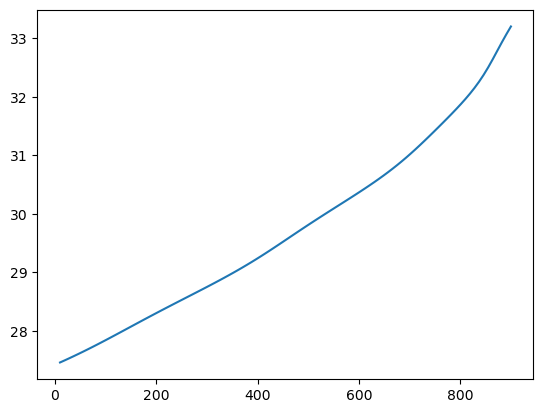

In [31]:
plt.plot(T_l, alpha[:, 0])

(300.0, 900.0)

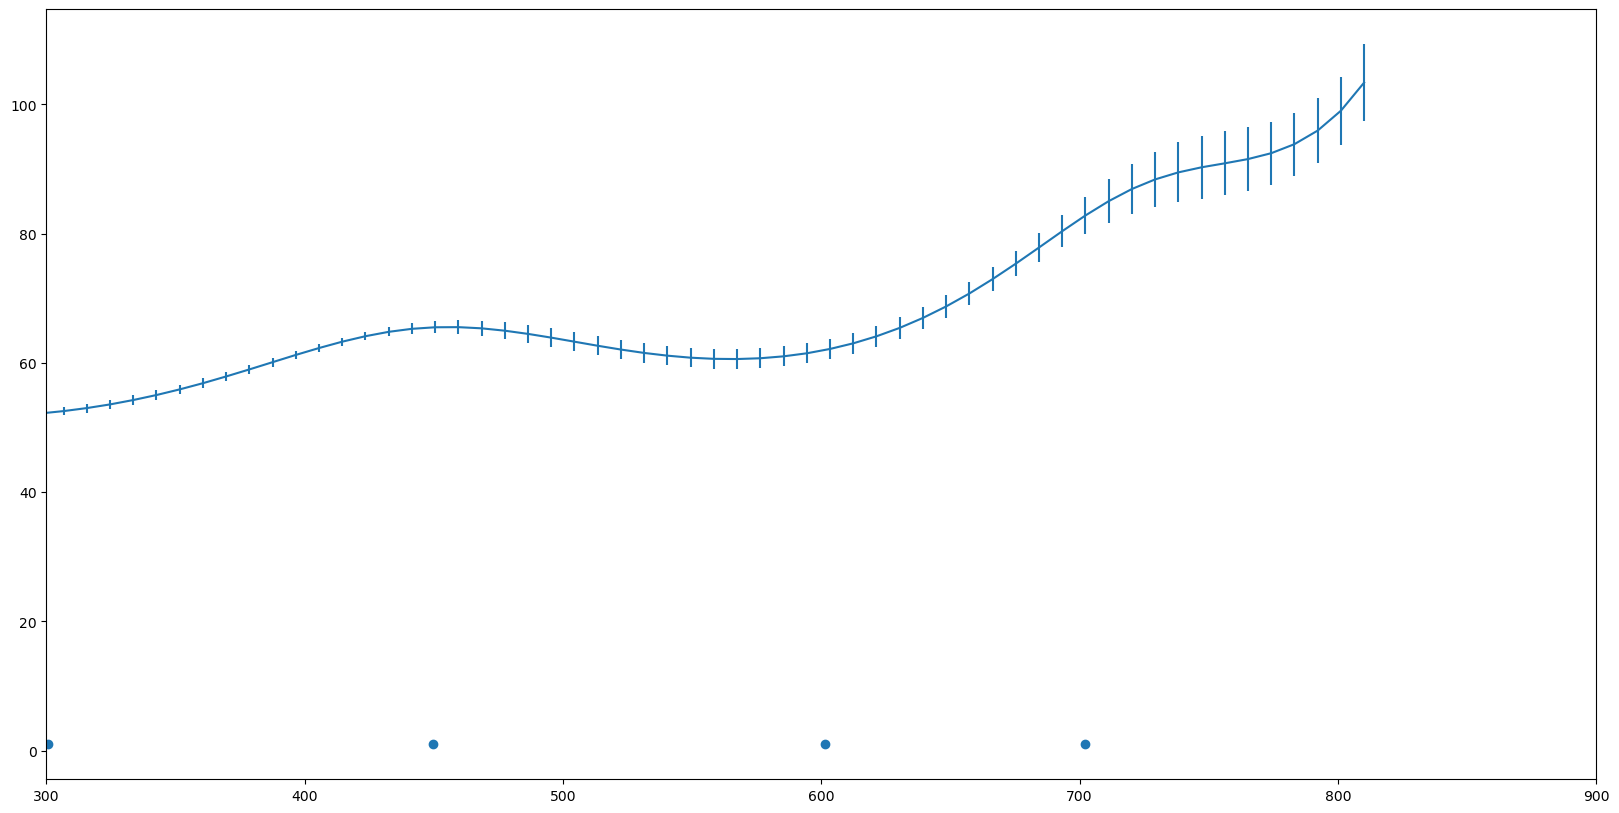

In [28]:
import matplotlib.pyplot as plt

Exp = np.genfromtxt("Exp_thermo.txt", delimiter=',')
plt.figure(figsize=(20, 10))
plt.errorbar(T_l[30:90], (alpha[30:90, 1])/3*1e6, yerr = alpha_var[30:90, 1]/3*1e6)
plt.scatter(Exp[:, 0], Exp[:, 1])

plt.xlim(300, 900)
#plt.ylim(0, 6e-4)

In [33]:
x[0]

306.66666666666663

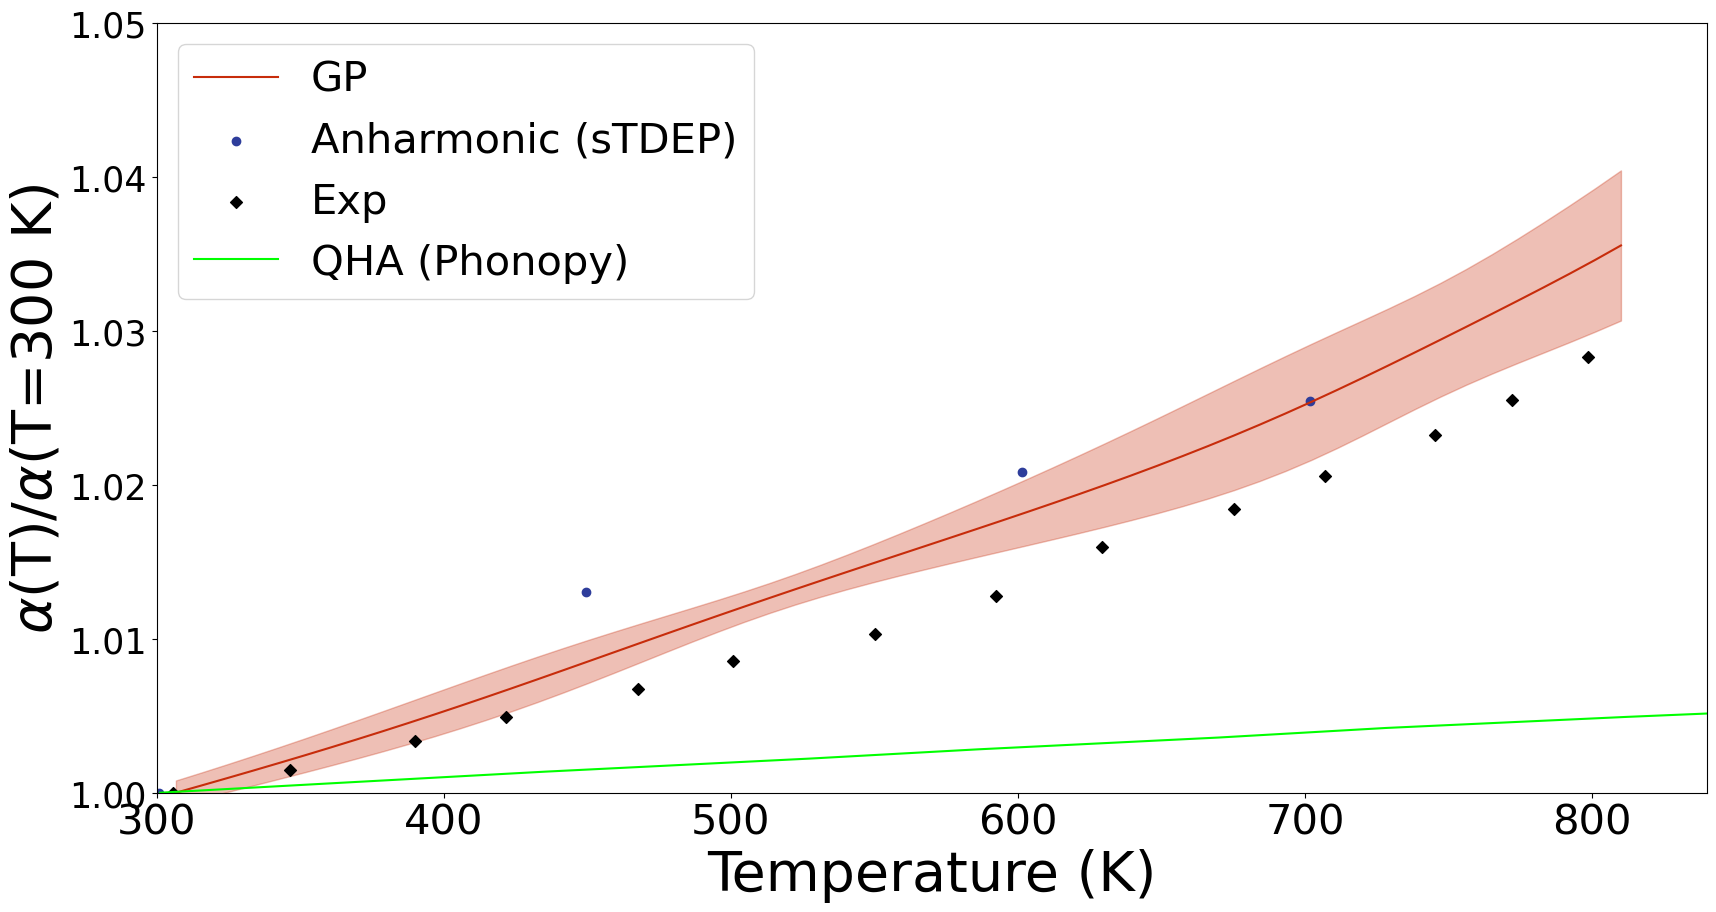

In [29]:
import matplotlib.pyplot as plt

color = ['#C72C0B', '#2E3D9B', '#00FF00', 'magenta', 'cyan', 'orange', 'gray']

Exp = np.genfromtxt("Exp_thermo.txt", delimiter=',')
Exp2 = np.genfromtxt("Exp_thermo2.txt", delimiter=',')
phonopy = np.genfromtxt("phonopy.txt", delimiter=', ')
plt.figure(figsize=(20, 10))

x = T_l[33:90]
y = (alpha[33:90, 0]*8)**(1/3.0)/(alpha[33, 0]*8)**(1/3.0)
err = alpha_var[33:90, 0]/3/(alpha[33, 0]*8)**(1/3.0)
plt.plot(x, y, label = "GP", color = color[0])
plt.fill_between(x, y-3*err, y+3*err, color = color[0], alpha = 0.3)
plt.scatter(Exp[1:, 0], Exp[1:, 1]/Exp[1, 1], label = "Anharmonic (sTDEP)", color = color[1])
plt.scatter(Exp2[9:, 0], Exp2[9:, 1]/Exp2[9, 1], label = "Exp", color = 'k', marker = 'D')
plt.plot(phonopy[:, 1], phonopy[:, 0]/phonopy[0, 0], color = color[2], label = "QHA (Phonopy)")
plt.xlim(300, 840)

plt.legend(fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylim(1, 1.05)

plt.yticks([1.00, 1.01, 1.02, 1.03, 1.04, 1.05], fontsize = 25)

plt.ylabel("$\\alpha$(T)/$\\alpha$(T=300 K)", fontsize = 40)
plt.xlabel("Temperature (K)", fontsize = 40)
plt.savefig("./thermo.pdf", format = "pdf", dpi = 400, bbox_inches='tight', pad_inches = 0.1)

In [45]:
T_l[32:90]

array([297.67676768, 306.66666667, 315.65656566, 324.64646465,
       333.63636364, 342.62626263, 351.61616162, 360.60606061,
       369.5959596 , 378.58585859, 387.57575758, 396.56565657,
       405.55555556, 414.54545455, 423.53535354, 432.52525253,
       441.51515152, 450.50505051, 459.49494949, 468.48484848,
       477.47474747, 486.46464646, 495.45454545, 504.44444444,
       513.43434343, 522.42424242, 531.41414141, 540.4040404 ,
       549.39393939, 558.38383838, 567.37373737, 576.36363636,
       585.35353535, 594.34343434, 603.33333333, 612.32323232,
       621.31313131, 630.3030303 , 639.29292929, 648.28282828,
       657.27272727, 666.26262626, 675.25252525, 684.24242424,
       693.23232323, 702.22222222, 711.21212121, 720.2020202 ,
       729.19191919, 738.18181818, 747.17171717, 756.16161616,
       765.15151515, 774.14141414, 783.13131313, 792.12121212,
       801.11111111, 810.1010101 ])

In [24]:
(alpha[25:90, 0]*8)**(1/3.0)/(alpha[25, 0]*8)**(1/3.0)

array([1.        , 1.00046848, 1.00093529, 1.00140112, 1.00186662,
       1.00233256, 1.00279978, 1.00326912, 1.00374148, 1.0042178 ,
       1.00469899, 1.00518606, 1.00567991, 1.00618148, 1.0066916 ,
       1.00721106, 1.00774045, 1.00828016, 1.00883032, 1.00939073,
       1.00996079, 1.01053956, 1.0111256 , 1.01171721, 1.01231238,
       1.01290911, 1.0135054 , 1.01409948, 1.01469   , 1.01527586,
       1.01585651, 1.01643171, 1.0170017 , 1.0175669 , 1.01812806,
       1.01868617, 1.0192423 , 1.01979777, 1.02035394, 1.02091235,
       1.02147456, 1.02204234, 1.02261748, 1.02320192, 1.02379767,
       1.0244069 , 1.02503175, 1.02567444, 1.02633701, 1.02702136,
       1.0277288 , 1.02846006, 1.02921487, 1.02999185, 1.03078848,
       1.03160138, 1.03242682, 1.0332615 , 1.03410323, 1.03495144,
       1.03580748, 1.03667477, 1.03755892, 1.03846778, 1.03941185])

In [23]:
(alpha[25, 0]*8)**(1/3.0)

6.106327307581691

In [22]:
alpha[25:90, 0]

array([28.46100628, 28.50102531, 28.54093927, 28.58080575, 28.62068142,
       28.66063224, 28.70072976, 28.74104692, 28.78166201, 28.8226561 ,
       28.86410848, 28.90610836, 28.94873377, 28.9920693 , 29.03618724,
       29.0811592 , 29.12703807, 29.17386107, 29.22164313, 29.27036817,
       29.31998813, 29.37042382, 29.42155162, 29.47322488, 29.52527078,
       29.57751467, 29.62978151, 29.68191582, 29.73379813, 29.78533074,
       29.83646404, 29.88717477, 29.9374831 , 29.98742408, 30.03706344,
       30.08648706, 30.13578916, 30.18508689, 30.23450025, 30.28416639,
       30.33422598, 30.38483684, 30.43616218, 30.48837601, 30.54166183,
       30.59621743, 30.65223931, 30.70993193, 30.76948466, 30.83107561,
       30.89483167, 30.96082619, 31.02904491, 31.09937173, 31.17158751,
       31.24539335, 31.3204562 , 31.39648279, 31.47327499, 31.5507851 ,
       31.62914004, 31.7086562 , 31.78985531, 31.87346904, 31.96047612])

In [19]:
 phonopy[:, 1]/phonopy[0, 1]

array([1.        , 1.19467799, 1.44498769, 1.75104475, 1.94572273,
       2.22396393, 2.41860888, 2.69691614, 2.94747361, 3.14230026])

In [321]:
T_l[25]

302.020202020202

([<matplotlib.axis.XTick at 0x7fdf20b8b700>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

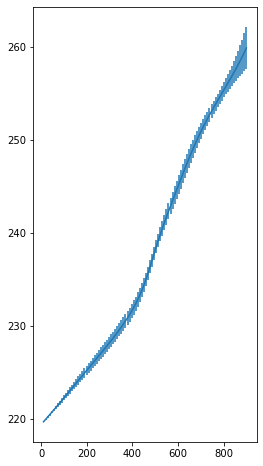

In [172]:
plt.figure(figsize = (4, 8))

plt.errorbar(T_l[:], alpha[:, 0]*8, yerr = alpha_var[:, 0]*8)
plt.xticks([0, 200, 400, 600, 800])

<ErrorbarContainer object of 3 artists>

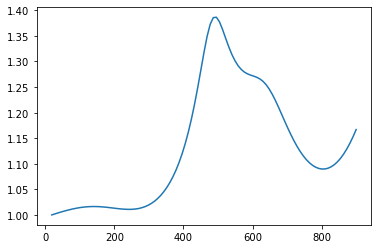

In [173]:
der = 1/alpha[1:, 0]**(1/3.0)*(alpha[1:, 0] - alpha[:-1, 0])**(1/3.0)/(T_l[1:] - T_l[:-1])

plt.errorbar(T_l[1:], der/der[0])

In [77]:
X_S0 = []
V = np.linspace(25, 35, 100)
for v in V:
    X_S0.append(['sol', 'd_0_1', v])

Y_GP = np.float64(GP_NaBr.S0['sol_fcc'].predict(X_S0)[:, 0])
X = np.float64(GP_NaBr.S0['sol_fcc'].X[1::2, 2])
Y = np.float64(GP_NaBr.S0['sol_fcc'].Y[1::2, 0])

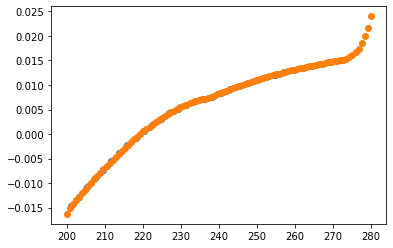

In [78]:
plt.scatter(X*8, Y)
plt.scatter(V*8, Y_GP)

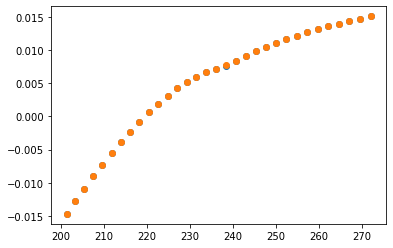

In [59]:
plt.scatter(X*8, Y)
plt.scatter(X*8, Y_GP)

In [57]:
phases = ["sol_fcc"]
bounds = [[20, 35]]

T_l = np.linspace(100, 900, 100)
B = np.zeros((len(T_l), 2))
B_var = np.zeros((len(T_l), 2))
for i, T in enumerate(T_l):
    y, y_var, V = GP_NaBr.compute_var('B', phases, P = mpfr(0/consts['Pk']), T = T*consts['k'], bounds = bounds)

    B[i, :], B_var[i, :] = print_point('B', phases, y, y_var)

[-0.17669208]
[-0.17669208]
[-0.17669208]
[-0.17669211]
[-0.61878121]
[-0.03148794]
[-0.00204941]
[-2.42051098e-05]
[2.23153764e-07]
[-2.46968121e-07]
[-3.03516027e-07]
[2.47032394e-07]
[-4.25314915e-07]
[-5.1000659e-07]
[-2.60758923e-07]
[-6.10113324e-08]
sol_fcc volume: 27.84228 ± 0.00312
sol_fcc bulk modulus in GPa: 19.00383 ± 0.12203
[-0.17929114]
[-0.17929114]
[-0.17929114]
[-0.17929116]
[-0.62449951]
[-0.03453818]
[-0.00240192]
[-3.19912346e-05]
[-1.27686836e-07]
[-2.55186148e-07]
[-2.37010752e-07]
[-2.50749268e-07]
[-3.80883871e-07]
[-1.10579616e-07]
[7.25028249e-08]
[6.66658088e-08]
[-8.75528693e-07]
[-1.62751644e-07]
[1.19030285e-07]
[2.7604612e-07]
[6.29590301e-08]
[3.99897471e-07]
[-2.11352095e-07]
[1.00964735e-08]
[-1.16837238e-07]
sol_fcc volume: 27.87921 ± 0.00332
sol_fcc bulk modulus in GPa: 18.80502 ± 0.11555
[-0.18141797]
[-0.18141797]
[-0.18141797]
[-0.18141799]
[-0.62900273]
[-0.03754666]
[-0.00275543]
[-4.02470046e-05]
[-3.24212615e-07]
[-1.4174124e-07]
[2.84249403e

[-1.16031556e-07]
sol_fcc volume: 28.65209 ± 0.00420
sol_fcc bulk modulus in GPa: 17.62819 ± 0.19450
[-0.18896283]
[-0.18896283]
[-0.18896283]
[-0.18896284]
[-0.62943267]
[-0.07772917]
[-0.00586663]
[-0.00041004]
[-3.87537023e-06]
[-1.17449586e-07]
[-8.04650705e-08]
[1.66495255e-07]
[1.76050114e-07]
[-7.82289988e-09]
[-1.76876612e-08]
[-9.37583468e-08]
[1.35965159e-07]
sol_fcc volume: 28.68809 ± 0.00434
sol_fcc bulk modulus in GPa: 17.47940 ± 0.19472
[-0.18872151]
[-0.18872151]
[-0.18872151]
[-0.18872152]
[-0.62580482]
[-0.0782114]
[-0.00600967]
[-0.00047273]
[-5.03925016e-06]
[-1.30413784e-07]
[5.50096834e-08]
[8.70114639e-08]
[1.18005236e-07]
[-3.70110382e-08]
[3.21558998e-08]
[5.48557856e-08]
[-9.57833537e-08]
[1.54209663e-07]
[1.64083617e-07]
[7.45593134e-08]
[1.38665662e-07]
sol_fcc volume: 28.72425 ± 0.00452
sol_fcc bulk modulus in GPa: 17.30831 ± 0.19576
[-0.18846365]
[-0.18846365]
[-0.18846365]
[-0.18846366]
[-0.62167139]
[-0.07852537]
[-0.00618472]
[-0.00054406]
[-6.71368652e-

/Users/temporary/anaconda3/envs/GPPhad/lib/python3.10/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


sol_fcc volume: 28.94777 ± 0.00630
sol_fcc bulk modulus in GPa: 15.84474 ± 0.17787
[-0.18666154]
[-0.18666154]
[-0.18666154]
[-0.18666155]
[-0.58497804]
[-0.07641632]
[-0.00798764]
[-0.00120466]
[-3.23406563e-05]
[7.64711361e-08]
[-2.11983187e-07]
[-7.49648443e-09]
[-8.71917772e-08]
[-1.54128437e-07]
sol_fcc volume: 28.98667 ± 0.00667
sol_fcc bulk modulus in GPa: 15.54422 ± 0.17292
[-0.18633103]
[-0.18633103]
[-0.18633103]
[-0.18633104]
[-0.57706008]
[-0.07538971]
[-0.00841736]
[-0.00135669]
[-4.06443242e-05]
[-3.37814649e-07]
[-3.32033149e-08]
[2.75545821e-08]
[-5.68805232e-09]
[7.3600951e-08]
[1.58495008e-07]
sol_fcc volume: 29.02620 ± 0.00706
sol_fcc bulk modulus in GPa: 15.23479 ± 0.16227
[-0.18599474]
[-0.18599474]
[-0.18599474]
[-0.18599475]
[-0.56887519]
[-0.0742168]
[-0.00887937]
[-0.00151979]
[-5.09194349e-05]
[-3.14479128e-07]
[-1.15192572e-09]
[-3.87576548e-08]
[4.5212319e-08]
[5.95345729e-08]
[2.38935409e-08]
[1.18597428e-07]
[9.39721155e-08]
[8.96626594e-08]
sol_fcc volume

[1.49573943e-07]
[-1.97731233e-08]
[5.08285509e-08]
[5.38268168e-08]
[-2.52205954e-08]
[6.56243401e-08]
[6.73808458e-08]
[-1.44337488e-08]
[-1.6603642e-08]
[1.44931482e-07]
[3.18043909e-08]
[4.05532256e-08]
[-3.91011009e-08]
sol_fcc volume: 29.87979 ± 0.00596
sol_fcc bulk modulus in GPa: 12.66865 ± 0.28829
[-0.17932945]
[-0.17932945]
[-0.17932945]
[-0.17932946]
[-1.32910881]
[-0.1477029]
[-0.11805457]
[-0.060493]
[-0.01790614]
[-0.00334961]
[-0.00012448]
[-9.88562495e-07]
[-3.38994488e-08]
[1.44847381e-07]
[7.10519233e-08]
[8.41079286e-08]
[1.46663925e-08]
[2.13529465e-08]
[2.95129418e-08]
[-1.93344495e-08]
[4.58437404e-09]
sol_fcc volume: 29.92508 ± 0.00602
sol_fcc bulk modulus in GPa: 12.72087 ± 0.29022
[-0.178993]
[-0.178993]
[-0.178993]
[-0.178993]
[-1.53048138]
[-0.15204099]
[-0.12713051]
[-0.07695611]
[-0.02077818]
[-0.00492541]
[-0.00021583]
[-2.45807865e-06]
[-4.98708178e-08]
[7.35923022e-08]
[-6.26304694e-08]
[3.22146264e-08]
[-1.61388899e-08]
[6.73810794e-09]
[-4.35556827e-08

[-0.17443764]
[-0.17443764]
[-10.48287341]
[-0.17088138]
[-0.17088137]
[-0.16987573]
[-0.16790034]
[-0.16408116]
[-0.15686944]
[-0.14338623]
[-0.11628074]
[-0.06673346]
[-0.02061904]
[-0.00480776]
[-0.00084318]
[-5.00277178e-05]
[-5.718339e-07]
[6.10386374e-08]
[1.65035269e-09]
[4.01693956e-08]
[2.41286766e-08]
[-5.05198275e-08]
[4.98843778e-08]
[4.82898962e-08]
[1.04624449e-09]
sol_fcc volume: 30.65992 ± 0.01899
sol_fcc bulk modulus in GPa: 10.43542 ± 0.16541
[-0.17417241]
[-0.17417241]
[-0.17417241]
[-0.17417242]
[-11.53962129]
[-0.17094958]
[-0.17094958]
[-0.16938634]
[-0.16634777]
[-0.16057423]
[-0.14985569]
[-0.12920058]
[-0.08743654]
[-0.02876419]
[-0.00763765]
[-0.00166328]
[-0.00015709]
[-3.69035813e-06]
[-6.0115481e-08]
[6.1718072e-09]
[-1.76192682e-09]
[2.93037133e-08]
[2.73700151e-08]
sol_fcc volume: 30.71191 ± 0.01994
sol_fcc bulk modulus in GPa: 10.08836 ± 0.15534
[-0.17391255]
[-0.17391255]
[-0.17391255]
[-0.17391256]
[-12.6410616]
[-0.17097698]
[-0.17097698]
[-0.17243056

[-1.33371003e-08]
[7.21790607e-08]
[-1.44267923e-08]
[-3.75224158e-08]
[1.19852811e-08]
[-1.94410268e-08]
[-6.79262673e-09]
[-2.69169866e-08]
[-5.00476317e-08]
[-2.71148008e-08]
[-1.04305573e-08]
[1.2436026e-08]
[-5.18934507e-09]
[-4.40613678e-08]
[-1.17951504e-08]
[-2.73917856e-08]
[-6.91377837e-09]
[9.02449384e-09]
sol_fcc volume: 31.45942 ± 0.02294
sol_fcc bulk modulus in GPa: 7.23776 ± 0.46474
[-0.17123539]
[-0.17123539]
[-0.17123539]
[-0.1712354]
[-25.13665778]
[-0.1697737]
[-0.16977371]
[-0.17049984]
[-0.16941408]
[-0.16870172]
[-0.16730353]
[-0.16460702]
[-0.15956186]
[-0.1504433]
[-0.13328211]
[-0.09801183]
[-0.04463782]
[-0.01570375]
[-0.00681054]
[-0.00146078]
[-0.00012082]
[-2.09408044e-06]
[3.78433274e-08]
[1.83158576e-08]
[-3.84114841e-08]
[-3.87480326e-08]
[3.32098637e-09]
[-4.08162276e-08]
[-3.52332838e-08]
[-2.05794672e-08]
[-4.52803255e-09]
sol_fcc volume: 31.52894 ± 0.02353
sol_fcc bulk modulus in GPa: 7.17110 ± 0.46607
[-0.17105064]
[-0.17105064]
[-0.17105064]
[-0.17

[-2.68050713e-08]
[2.11968471e-08]
[-8.11374891e-08]
[-1.1644818e-09]
[1.04686753e-08]
[-3.61142418e-08]
[2.49714378e-08]
[9.46123505e-09]
[2.65986879e-08]
[-1.87661959e-08]
[7.57506963e-09]
sol_fcc volume: 32.56948 ± 0.05277
sol_fcc bulk modulus in GPa: 4.51553 ± 0.45872
[-0.1693171]
[-0.1693171]
[-0.1693171]
[-0.1693171]
[-19.61685916]
[-0.16742134]
[-0.16742131]
[-0.1672708]
[-0.16712079]
[-0.16682241]
[-0.16623178]
[-0.16507476]
[-0.16285254]
[-0.15873189]
[-0.15143256]
[-0.13813658]
[-0.11014546]
[-0.06247796]
[-0.02449851]
[-0.01406066]
[-0.00529704]
[-0.00189992]
[-0.00030886]
[-1.37024922e-05]
[-6.49779586e-08]
[1.58026192e-08]
[-1.12470295e-08]
[2.70856266e-08]
[3.33145887e-08]
[-9.34732614e-09]
[1.27937839e-08]
[2.12128678e-08]
[2.59513363e-08]
[2.92194523e-09]
sol_fcc volume: 32.69726 ± 0.06128
sol_fcc bulk modulus in GPa: 4.44588 ± 0.36893
[-0.16921362]
[-0.16921362]
[-0.16921362]
[-0.16921362]
[-18.28222278]
[-0.16717726]
[-0.1671772]
[-0.16710722]
[-0.16707229]
[-0.167002

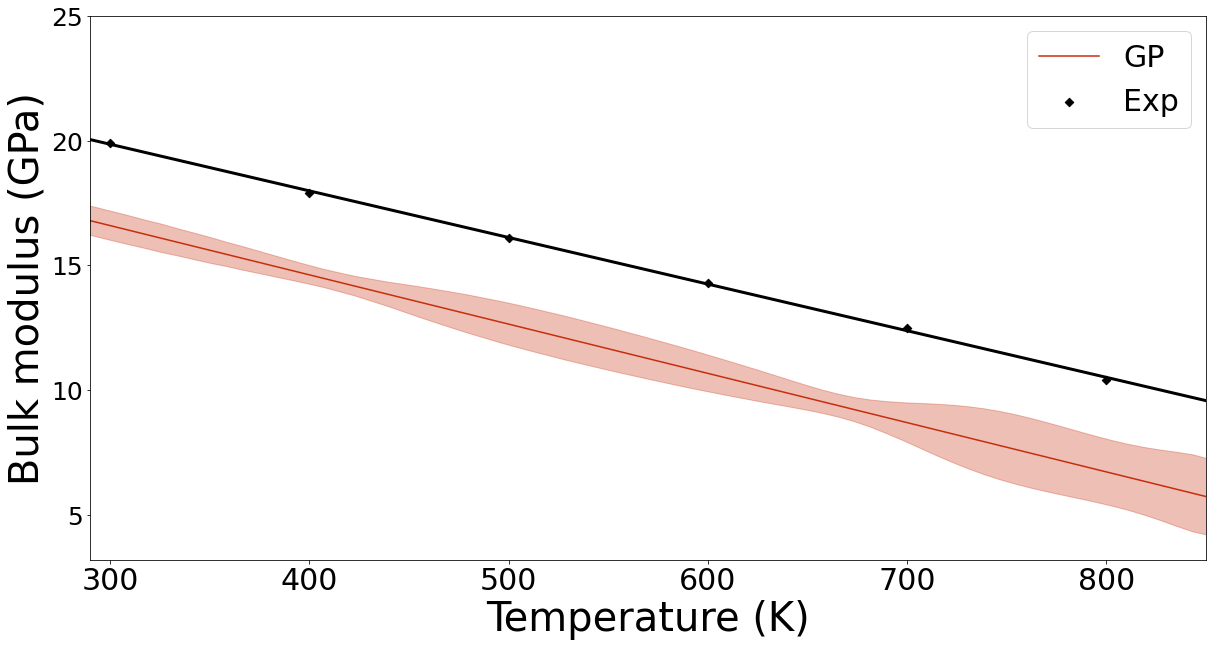

In [72]:
import matplotlib.pyplot as plt
x_exp = [300, 400, 500, 600, 700, 800, 900, 1000]
y_exp = [19.9, 17.9, 16.1, 14.3, 12.5, 10.4, 9.6, 7.9]
plt.figure(figsize = (20, 10))
T_l = np.linspace(100, 900, 100)
x = T_l[:95]
y = p_GP[1]+x*p_GP[0]
err = B_var[:95, 1]

#plt.scatter(x, B[:95, 1], color = color[0])

plt.plot(x,y, color =color[0], label = "GP")
plt.fill_between(x,y-3*err,y+3*err, color =color[0], alpha = 0.3)

plt.scatter(x_exp, y_exp, color = 'k', marker='D',label = "Exp")
plt.plot(T_l, p_exp[1]+T_l*p_exp[0], color ='k', lw = 3)
#plt.ylim(0, 2e-4)
plt.legend(fontsize = 30)
plt.xlim(290, 850)

plt.xticks([300, 400, 500, 600, 700, 800], fontsize = 30)
plt.yticks([5, 10, 15, 20, 25], fontsize = 25)
plt.ylabel("Bulk modulus (GPa)", fontsize = 40)
plt.xlabel("Temperature (K)", fontsize = 40)
plt.savefig("./bulk.pdf", format = "pdf", dpi = 400, bbox_inches='tight', pad_inches = 0.1)

In [295]:
p_exp[1]+T_l*p_exp[0]

array([23.6047619 , 23.45353535, 23.3023088 , 23.15108225, 22.9998557 ,
       22.84862915, 22.6974026 , 22.54617605, 22.39494949, 22.24372294,
       22.09249639, 21.94126984, 21.79004329, 21.63881674, 21.48759019,
       21.33636364, 21.18513709, 21.03391053, 20.88268398, 20.73145743,
       20.58023088, 20.42900433, 20.27777778, 20.12655123, 19.97532468,
       19.82409812, 19.67287157, 19.52164502, 19.37041847, 19.21919192,
       19.06796537, 18.91673882, 18.76551227, 18.61428571, 18.46305916,
       18.31183261, 18.16060606, 18.00937951, 17.85815296, 17.70692641,
       17.55569986, 17.4044733 , 17.25324675, 17.1020202 , 16.95079365,
       16.7995671 , 16.64834055, 16.497114  , 16.34588745, 16.19466089,
       16.04343434, 15.89220779, 15.74098124, 15.58975469, 15.43852814,
       15.28730159, 15.13607504, 14.98484848, 14.83362193, 14.68239538,
       14.53116883, 14.37994228, 14.22871573, 14.07748918, 13.92626263,
       13.77503608, 13.62380952, 13.47258297, 13.32135642, 13.17

In [275]:
T_l[25]

302.020202020202

In [278]:
print((17.9 - 9.6)/(800 - 300))
print((B[25, 1] - B[95, 1])/(T_l[94] - T_l[25]))

0.016599999999999997
0.022720394164176372


In [59]:
import numpy as np
p_GP = np.polyfit(T_l[25:95], B[25:95, 1], 1)
p_exp = np.polyfit(x_exp[:-2], y_exp[:-2], 1)

In [291]:
print(p_GP)
print(p_exp)

[-1.97752513e-02  2.25300212e+01]
[-1.87142857e-02  2.54761905e+01]


In [ ]:
0.2

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 5))
plt.errorbar(T_l[:95], B[:95, 1], yerr = B_var[:95, 1]*2, label = 'GP')
plt.scatter([300, 400, 500, 600, 700, 800, 900, 1000], [19.9, 17.9, 16.1, 14.3, 12.5, 10.4, 9.6, 7.9], color = 'r', label = "Exp")
#plt.ylim(0, 2e-4)
plt.legend(fontsize = 25)
plt.xlim(290, 1000)

<ErrorbarContainer object of 3 artists>

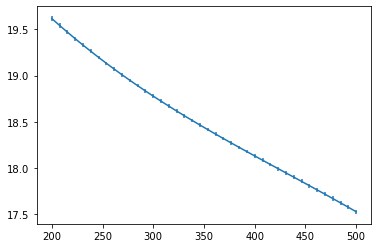

In [23]:
import matplotlib.pyplot as plt
plt.errorbar(T_l, B[:, 1], yerr = B_var[:, 1])


In [5]:
phases = ["sol_bcc"]
bounds = [[10, 24]]

T_l = np.linspace(200, 500, 40)
gamma = np.zeros((len(T_l), 2))
gamma_var = np.zeros((len(T_l), 2))
for i, T in enumerate(T_l):
    y, y_var, V = GP_Li.compute_var('gamma', phases, P = mpfr(0/consts['Pk']), T = T*consts['k'], bounds = bounds)

    gamma[i, :], gamma_var[i, :] = print_point('gamma', phases, y, y_var)

[-1.28704753]
[-1.28704753]
[-1.28704753]
[-1.28704747]
[-0.45028168]
[-0.22158072]
[-0.07120281]
[-0.01621891]
[-0.00155206]
[-3.77577529e-05]
[-9.03394354e-08]
[-5.72610359e-12]
[5.33731515e-12]
[2.3796447e-12]
[-6.90419181e-12]
[4.09854267e-12]
[1.55234232e-08]
[-9.29421992e-12]
[-5.08765568e-12]
sol_bcc volume: 20.74072 ± 0.00294
sol_bcc grunaisen parameter in arbitary units: 2.23344 ± 0.48125
[-1.24455697]
[-1.24455697]
[-1.24455697]
[-1.24455692]
[-0.43651096]
[-0.21539737]
[-0.06965372]
[-0.01604101]
[-0.00156632]
[-3.93986997e-05]
[-9.95486966e-08]
[-9.02033291e-12]
[-5.02060475e-12]
[8.1189227e-12]
[2.79033589e-12]
[4.17959653e-12]
[3.26007255e-12]
[1.48155883e-08]
[5.61601211e-12]
sol_bcc volume: 20.76763 ± 0.00266
sol_bcc grunaisen parameter in arbitary units: 2.18382 ± 0.39773
[-1.20513546]
[-1.20513546]
[-1.20513546]
[-1.2051354]
[-0.42373553]
[-0.20966416]
[-0.06822401]
[-0.01588326]
[-0.00158224]
[-4.11403004e-05]
[-1.09716421e-07]
[-1.39906981e-11]
[7.62428395e-13]
sol_

[-6.56084971e-10]
[-3.39410848e-12]
sol_bcc volume: 21.42942 ± 0.00284
sol_bcc grunaisen parameter in arbitary units: 1.63462 ± 0.08715
[-0.69431565]
[-0.69431565]
[-0.69431565]
[-0.69431562]
[-0.25855884]
[-0.13620786]
[-0.05117161]
[-0.01532625]
[-0.00244747]
[-0.0001408]
[-1.38073252e-06]
[-7.9036436e-10]
[-4.24968665e-13]
sol_bcc volume: 21.45434 ± 0.00292
sol_bcc grunaisen parameter in arbitary units: 1.61638 ± 0.08520
[-0.68427189]
[-0.68427189]
[-0.68427189]
[-0.68427186]
[-0.2553478]
[-0.13481768]
[-0.05090955]
[-0.01538593]
[-0.00249959]
[-0.0001481]
[-1.52464047e-06]
[-9.37972702e-10]
[-2.68352682e-12]
sol_bcc volume: 21.47936 ± 0.00300
sol_bcc grunaisen parameter in arbitary units: 1.59711 ± 0.08364
[-0.6745815]
[-0.6745815]
[-0.6745815]
[-0.67458148]
[-0.25225497]
[-0.1334831]
[-0.05066439]
[-0.01545052]
[-0.00255361]
[-0.00015583]
[-1.68441834e-06]
[-1.12304202e-09]
[-1.49808776e-12]
sol_bcc volume: 21.50448 ± 0.00310
sol_bcc grunaisen parameter in arbitary units: 1.57680 

<ErrorbarContainer object of 3 artists>

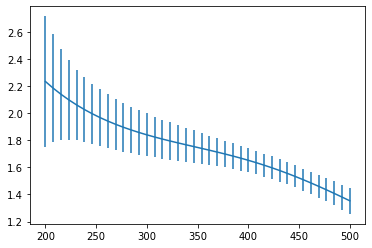

In [6]:
import matplotlib.pyplot as plt
plt.errorbar(T_l, gamma[:, 1], yerr = gamma_var[:, 1])

#plt.ylim(0, 2e-4)

# Triple point calculation

In [6]:
opt = 'triple'
k = consts['k']
dv = 3
x = [14.289, 14.383, 14.281, 500.380]
bounds = [[x[0]-2, x[0]+2], [x[1]-dv, x[1]+dv], [x[2] - dv, x[2]+dv], [(x[3] - dv*20)*k, (x[3] + dv*20)*k]]
phases = ['sol_fcc', 'liq', 'sol_bcc']
y, y_var, V = GP_Li.compute_var('triple', phases, bounds = bounds,  full = True)

point, point_var = print_point('triple', phases, y, y_var)

[-0.03416371  0.48885369  0.07807863 -1.12752781]
[-0.03416371  0.48885369  0.07807863 -1.12752781]
[-0.03416371  0.48885369  0.07807863 -1.12752781]
[-0.03416359  0.48885202  0.07807863 -1.12752781]
[-0.03416372  0.48885393  0.07807865 -1.12752805]
[-0.03416371  0.48885369  0.07807861 -1.12752755]
[-0.03416371  0.48885369  0.07807863 -1.12752781]
[ 0.33860333 -4.65161885 -0.03866223  0.45644502]
[ 0.0134748  -0.21759598  0.0009902  -0.00181152]
[ 0.0495074  -0.71698409  0.00498806 -0.07307815]
[-0.00266763 -0.00433593  0.00652767 -0.06317791]
[-0.01536269  0.22784041  0.00608408 -0.09970303]
[-0.00458251  0.05312029  0.00108666 -0.01136376]
[-0.00378799  0.04372027 -0.00295291  0.0462761 ]
[-0.00274357  0.03584171 -0.00047273  0.0031835 ]
[ 0.00012464 -0.00463219 -0.00281769  0.0372936 ]
[-0.00097892  0.01258857 -0.00112675  0.01112552]
[ 0.00090205 -0.02010107 -0.00097711  0.01508106]
[-0.00039109 -0.00188431 -0.00028178  0.00494303]
[ 0.00020562 -0.01040353  0.00139506 -0.01838189]


# Coexistance point calculation

In [6]:
bounds = [[14, 15], [14, 16]]
T = 300*k
phases = ["sol_fcc", "sol_bcc"]

y_tp, y_tp_var, V = GP_Li.compute_var('tp', phases, T = T, bounds = bounds)

point, point_var = print_point('tp', phases, y_tp, y_tp_var)

[-0.20824831 -0.0590565 ]
[-0.20824831 -0.0590565 ]
[-0.20824831 -0.0590565 ]
[-0.20824828 -0.05905648]
[-0.20824832 -0.0590565 ]
[ 0.08532381 -0.02925469]
[-0.04906394 -0.02368332]
[-0.01665354 -0.02136265]
[ 8.55905609e-05 -1.71532057e-02]
[-0.00818162 -0.00747279]
[-0.00800512 -0.00102278]
[-0.00178082  0.00010661]
[-2.88975526e-04  5.38265833e-05]
[ 3.30701729e-04 -5.73236695e-05]
[ 1.58460615e-06 -1.18020665e-07]
[ 6.02753547e-08 -2.39555853e-08]
[-2.35341409e-08  8.36790182e-09]
[ 3.52797862e-08 -1.08716491e-09]
[-3.18664191e-08 -1.90638405e-09]
[-3.03315384e-08  9.69074271e-09]
[-3.2299126e-08  8.3679087e-09]
[-7.16321993e-08  1.15327548e-09]
[-9.68995995e-09  5.10257886e-09]
[9.07133249e-08 5.66159514e-09]
[1.82538482e-07 2.89951605e-08]
[-6.10672068e-09 -2.67260769e-09]
[-1.84560114e-08  5.10258513e-09]
[8.24327657e-08 1.64058602e-08]
[5.88989968e-08 1.27064298e-09]
[3.31817593e-08 2.43931092e-09]
[-4.09453671e-09 -2.52239174e-09]
[8.84147850e-08 1.83023765e-08]
sol_fcc volume

# Pressure point calculation

In [7]:
phases = ["sol_fcc", "liq"]
x_fixed = [5, (10**10)**3]
bounds = [[10, 11], [10, 11], [300*k, 550*k]]

y_pt, y_pt_var, V = GP_Li.compute_var('pt', phases, P = mpfr(30/consts['Pk']), bounds = bounds)

point, point_var = print_point('pt', phases, y_pt, y_pt_var)

[0.01746033 0.02120203 0.03078066]
[0.01746033 0.02120203 0.03078066]
[0.01746033 0.02120203 0.03078066]
[0.01746028 0.02120203 0.03078062]
[0.01746033 0.02120203 0.03078065]
[0.01746033 0.02120203 0.03078066]
[ 0.01785125 -0.00413424  0.03605612]
[ 0.01805953 -0.00172478  0.00890643]
[ 0.01851786  0.00311393 -0.0348311 ]
[ 0.01857558 -0.00074204 -0.03083115]
[ 0.01805943 -0.00172478  0.0089064 ]
[ 0.01805953 -0.00172478  0.00890643]
[ 0.01805953 -0.00172478  0.00890643]
[0.01814332 0.00022517 0.00643539]
[ 0.01823708 -0.00044233  0.00570377]
[ 0.01823845 -0.00131111 -0.00012377]
[ 0.0181823  -0.00153496  0.00535285]
[ 0.01823799 -0.00150957  0.00436895]
[ 0.01823843 -0.00131111 -0.00012378]
[ 0.01823845 -0.00131111 -0.00012377]
[ 0.01823845 -0.00131111 -0.00012377]
[ 0.01824975 -0.00130488  0.00013619]
[ 0.0182327  -0.00131422 -0.00025388]
[ 0.01822036 -0.00131348 -0.00010334]
[ 0.01819706 -0.00131357 -0.0004214 ]
[ 0.01814797 -0.00131019 -0.00010803]
[ 0.01805218 -0.00130548 -0.00048

# Active selection

In [8]:
V = np.linspace(13, 15, 5)
T = np.linspace(10, 510, 5)
k = consts['k']
phase = ['sol_fcc']
N = 8**3*4
c = 5
net = []
for t in T:
    for v in V:
        net.append([phase[0], 'd_1_0', t*k, v, 5, N])
        net.append([phase[0], 'd_0_1', t*k, v, 5, N])
        
phases = ['sol_fcc', 'liq', 'sol_bcc']
dv = 3
x = [14.289, 14.383, 14.281, 500.380]
bounds = [[x[0]-dv, x[0]+dv], [x[1]-dv, x[1]+dv], [x[2] - dv, x[2]+dv], [(x[3] - dv*20)*k, (x[3] + dv*20)*k]]

best_ind, score_best, Var_old = GP_Li.ad_step('triple', net, phases, it = 0, bounds = bounds)

[-0.0341636   0.4888521   0.07807863 -1.12752781]
[-0.0341636   0.4888521   0.07807863 -1.12752781]
[-0.0341636   0.4888521   0.07807863 -1.12752781]
[-0.03416368  0.48885333  0.07807863 -1.12752781]
[-0.03416361  0.48885234  0.07807865 -1.12752805]
[-0.0341636   0.4888521   0.07807861 -1.12752755]
[-0.0341636   0.4888521   0.07807863 -1.12752781]
[ 0.37210157 -5.17814299 -0.03371194  0.40198469]
[ 0.04268007 -0.63752672  0.00154232 -0.0078205 ]
[ 0.12022649 -1.77966228  0.01760351 -0.21067156]
[ 0.00307277 -0.11333705  0.01150745 -0.1108613 ]
[-0.04313964  0.63859111  0.01126666 -0.19572589]
[ 0.01244621 -0.16698033  0.01024663 -0.16617422]
[ 0.00307285 -0.1133382   0.01150745 -0.1108613 ]
[ 0.00307275 -0.11333678  0.01150747 -0.11086156]
[ 0.00307277 -0.11333705  0.01150743 -0.11086102]
[ 0.00307277 -0.11333705  0.01150745 -0.1108613 ]
[-0.01682096  0.22478058  0.00326094 -0.03992964]
[-0.00445184  0.04349181  0.00343689 -0.03992211]
[-0.01465031  0.18407391  0.00067209  0.00707328]
